In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [3]:
df = pd.read_excel('CM -  Data sample - Supply Excellence Business Case - External candidates.xlsx', engine='openpyxl')

# General investigation
## I- Data Cleaning

In [4]:
# Exploring dataset
df.shape

(2473, 19)

In [5]:
# Let's take a look at our data
df.head()

,id,final_status,store_address_id,customer_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,last_courier_assigned_time,courier_started_order_local,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time,Count,Total Time
0,53134335,DeliveredStatus,85260,18579597,20153483,WALL - Partner,1,BICYCLE,1,6,2019-07-13 13:04:44,2019-07-13 13:05:32,2019-07-13 13:06:49,2019-07-13 13:09:13,2019-07-13 13:28:45,2019-07-13 13:46:58,2019-07-13 13:59:49,NaN,55
1,53009545,DeliveredStatus,23517,11871195,20153483,WALL - Partner,1,BICYCLE,1,4,2019-07-12 20:06:29,2019-07-12 20:10:42,2019-07-12 20:11:02,2019-07-12 20:16:05,2019-07-12 20:23:07,2019-07-12 20:37:53,2019-07-12 20:43:01,NaN,36
2,53129297,DeliveredStatus,18300,1053786,20153483,WALL - Partner,1,BICYCLE,1,5,2019-07-13 12:14:58,2019-07-13 12:15:44,2019-07-13 12:23:40,2019-07-13 12:45:16,2019-07-13 12:50:09,2019-07-13 12:55:16,2019-07-13 12:59:23,NaN,44
3,53235752,CanceledStatus,85260,20466508,20153483,WALL - Partner,1,BICYCLE,1,6,2019-07-13 21:55:58,2019-07-13 22:24:58,2019-07-13 22:24:58,NaT,NaT,NaT,2019-07-13 22:25:15,NaN,29
4,53002671,DeliveredStatus,15912,16549489,20153483,WALL - Partner,1,BICYCLE,1,3,2019-07-12 19:40:13,2019-07-12 19:41:14,2019-07-12 19:42:34,2019-07-12 19:46:28,2019-07-12 19:56:59,2019-07-12 20:07:08,2019-07-12 20:10:37,NaN,30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   id                                        2471 non-null   float64       
 1   final_status                              2471 non-null   object        
 2   store_address_id                          2440 non-null   float64       
 3   customer_id                               2471 non-null   float64       
 4   courier_id                                2471 non-null   float64       
 5   vertical                                  2471 non-null   object        
 6   is_food                                   2471 non-null   float64       
 7   transport                                 2471 non-null   object        
 8   number_of_assignments                     2471 non-null   float64       
 9   total_real_distance           

In [7]:
df.describe()

,id,store_address_id,customer_id,courier_id,is_food,number_of_assignments,total_real_distance,Count,Total Time
count,2471,2440,2471,2471,2471,2471,2471,0,2473
mean,52892640,29271,12263806,13911511,1,1,5,NaN,31
std,345401,21871,6560418,4934578,0,0,2,NaN,13
min,52259964,15727,94425,2044461,0,1,1,NaN,0
25%,52619348,18300,5659130,9558769,1,1,3,NaN,22
50%,52862774,18300,13735060,14924108,1,1,5,NaN,31
75%,53204837,30640,18139838,17787524,1,1,6,NaN,40
max,53475647,90971,20625329,20550754,1,6,20,NaN,59


In [8]:
df[df.isna()].id.count()

0

In [9]:
# number of couriers
len(df.courier_id.unique())

84

In [10]:
# change boolean data to binary
#check final status values
df.final_status.value_counts()

# changing datatype
df.final_status = df.final_status.apply(lambda x: 1 if x == 'DeliveredStatus' else 0)

In [11]:
# Dropping unwanted columns
df_clean = df.copy()
df_clean.drop(columns=['customer_id', 'Count'], inplace=True)

In [12]:
# renaming total time column
df_clean.rename(columns={'Total Time': 'total_time'}, inplace=True)

In [13]:
df_clean.columns

Index(['id', 'final_status', 'store_address_id', 'courier_id', 'vertical',
       'is_food', 'transport', 'number_of_assignments', 'total_real_distance',
       'activation_time_local', 'last_courier_assigned_time',
       'courier_started_order_local', 'courier_enters_pickup_time_local',
       'pickup_time_local', 'courier_enters_delivery_point_time_local',
       'termination_time', 'total_time'],
      dtype='object')

In [14]:
df_clean.shape

(2473, 17)

In [15]:
data_count_before_drop = df_clean.shape[0]

In [16]:
# Dropping Null rows
df_clean.dropna(inplace=True)
data_count_after_drop = df_clean.shape[0]

In [17]:
print('Percentage of remained data from the dataset:', (data_count_after_drop / data_count_before_drop) * 100, '%')

Percentage of remained data from the dataset: 96.40113222806308 %


In [18]:
df_clean.shape

(2384, 17)

## II- Exploring Data

In [19]:
df_clean.sample(20)

,id,final_status,store_address_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,last_courier_assigned_time,courier_started_order_local,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time,total_time
542,53432488,1,18300,8728852,WALL - Partner,1,MOTORBIKE,1,6,2019-07-14 21:16:25,2019-07-14 21:27:06,2019-07-14 21:32:36,2019-07-14 21:19:50,2019-07-14 21:47:20,2019-07-14 21:56:53,2019-07-14 21:59:12,42
1736,52702511,1,18300,17209225,WALL - Partner,1,BICYCLE,1,5,2019-07-10 21:42:04,2019-07-10 22:17:11,2019-07-10 22:17:19,2019-07-10 21:53:28,2019-07-10 22:58:58,2019-07-10 23:04:36,2019-07-10 23:06:53,24
589,53463673,1,18300,16974420,WALL - Partner,1,BICYCLE,1,4,2019-07-14 22:45:12,2019-07-14 22:45:22,2019-07-14 22:57:47,2019-07-14 22:57:37,2019-07-14 23:07:17,2019-07-14 23:15:21,2019-07-14 23:26:22,41
244,52945760,1,23517,6211472,WALL - Partner,1,MOTORBIKE,1,3,2019-07-12 13:41:33,2019-07-12 13:42:15,2019-07-12 13:43:19,2019-07-12 13:49:22,2019-07-12 13:57:13,2019-07-12 14:05:29,2019-07-12 14:07:19,25
2284,52842594,1,18300,16298640,WALL - Partner,1,BICYCLE,1,5,2019-07-11 20:30:51,2019-07-11 20:31:56,2019-07-11 20:32:21,2019-07-11 20:52:57,2019-07-11 21:15:57,2019-07-11 21:25:53,2019-07-11 21:30:14,59
933,53007775,1,18300,14306604,WALL - Partner,1,BICYCLE,1,7,2019-07-12 20:00:10,2019-07-12 20:00:32,2019-07-12 20:06:12,2019-07-12 20:12:34,2019-07-12 20:25:09,2019-07-12 20:34:34,2019-07-12 20:40:44,40
2043,52681112,1,18300,15623935,WALL - Partner,1,BICYCLE,1,6,2019-07-10 20:18:15,2019-07-10 20:41:37,2019-07-10 20:41:52,2019-07-10 20:58:54,2019-07-10 21:05:47,2019-07-10 21:17:54,2019-07-10 21:20:15,2
369,52816592,1,15727,18771815,WALL - Partner,1,CAR,1,9,2019-07-11 18:26:36,2019-07-11 18:36:55,2019-07-11 19:25:18,2019-07-11 19:36:52,2019-07-11 19:48:56,2019-07-11 20:00:57,2019-07-11 20:09:24,42
2321,53176701,1,36615,18771818,WALL - Partner,1,BICYCLE,1,1,2019-07-13 17:49:56,2019-07-13 17:50:21,2019-07-13 17:50:48,2019-07-13 17:49:58,2019-07-13 17:58:05,2019-07-13 18:01:05,2019-07-13 18:04:05,14
1715,52465446,1,15727,14631671,WALL - Partner,1,MOTORBIKE,1,9,2019-07-09 13:05:24,2019-07-09 13:05:59,2019-07-09 13:06:16,2019-07-09 13:25:20,2019-07-09 13:34:35,2019-07-09 13:48:02,2019-07-09 13:49:24,44


In [20]:
# Getting number of orders made by each type of transport
df_clean.transport.value_counts()

BICYCLE      1224
MOTORBIKE     754
CAR           406
Name: transport, dtype: int64

In [21]:
df_clean.vertical.value_counts()

WALL - Partner       2361
WALL - NonPartner      23
Name: vertical, dtype: int64

In [22]:
# Changing transport & vertical datatypes into catgorical
df_clean.transport = pd.Categorical(df_clean.transport)
df_clean.vertical = pd.Categorical(df_clean.vertical)

In [23]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2384 entries, 0 to 2470
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   id                                        2384 non-null   float64       
 1   final_status                              2384 non-null   int64         
 2   store_address_id                          2384 non-null   float64       
 3   courier_id                                2384 non-null   float64       
 4   vertical                                  2384 non-null   category      
 5   is_food                                   2384 non-null   float64       
 6   transport                                 2384 non-null   category      
 7   number_of_assignments                     2384 non-null   float64       
 8   total_real_distance                       2384 non-null   float64       
 9   activation_time_local         

In [24]:
# Let's see the total time each courier taken for all orders he/she made
courier_total_duration = df_clean.groupby(['courier_id']).agg(order_count=pd.NamedAgg(column="total_time", aggfunc="count"), total_time=pd.NamedAgg(column="total_time", aggfunc="sum"), transport=pd.NamedAgg(column="transport", aggfunc="first"))
courier_total_duration.head()

,order_count,total_time,transport
courier_id,,,
2044461,32,1018,BICYCLE
2146758,43,1526,MOTORBIKE
2234219,35,1038,MOTORBIKE
4055620,59,1800,MOTORBIKE
6077019,2,51,CAR


In [25]:
courier_total_duration['avg_time_per_order'] = courier_total_duration.total_time / courier_total_duration.order_count

In [26]:
courier_total_duration = courier_total_duration.reset_index()

In [27]:
courier_total_duration.head(10)

,courier_id,order_count,total_time,transport,avg_time_per_order
0,2044461,32,1018,BICYCLE,32
1,2146758,43,1526,MOTORBIKE,35
2,2234219,35,1038,MOTORBIKE,30
3,4055620,59,1800,MOTORBIKE,31
4,6077019,2,51,CAR,26
5,6211472,43,1510,MOTORBIKE,35
6,6212245,106,3403,MOTORBIKE,32
7,6271437,4,162,CAR,40
8,6543753,16,603,CAR,38
9,7290210,18,685,BICYCLE,38


<AxesSubplot:xlabel='total_time', ylabel='Count'>

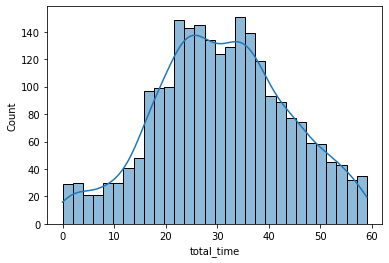

In [28]:
# checking the destribution for the total_time
sns.histplot(data=df_clean, x="total_time", kde=True, bins=30)

[Text(0.5, 1.0, 'Plotting Orders Average Delay'),
 Text(0.5, 0, 'Time avg_time_per_order Per Order')]

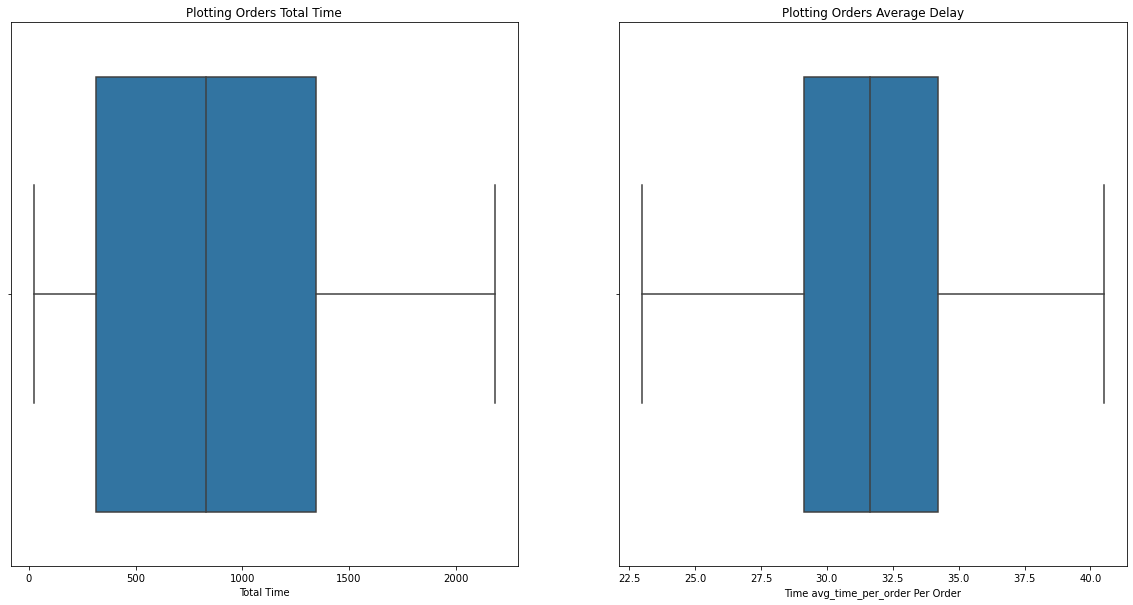

In [36]:
# Exploring outliers
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))

ax1 = sns.boxplot(data=courier_total_duration, x='total_time', ax=ax[0])
ax1.set(title='Plotting Orders Total Time', xlabel='Total Time')
ax2 = sns.boxplot(data=courier_total_duration, x='avg_time_per_order', ax=ax[1])
ax2.set(title='Plotting Orders Average Delay', xlabel='Time avg_time_per_order Per Order')

In [37]:
# Getting outliers bariers
total_time_75 = courier_total_duration.total_time.quantile(0.75)
total_time_25 = courier_total_duration.total_time.quantile(0.25)
total_time_iqr = total_time_75 - total_time_25

print('Total Time 75%: {}\nTotal Time 25%: {}\nTotal Time IQR: {}'.format(total_time_75, total_time_25, total_time_iqr))

total_time_upper = total_time_75 + (1.5 * total_time_iqr)
total_time_lower = total_time_25 - (1.5 * total_time_iqr)

print(f'\nTotal Time Outliers Upper Barier: {total_time_upper}\nTotal Time Outlier Lower Barier: {total_time_lower}')

Total Time 75%: 1346.75
Total Time 25%: 317.0
Total Time IQR: 1029.75

Total Time Outliers Upper Barier: 2891.375
Total Time Outlier Lower Barier: -1227.625


In [38]:
# Getting outliers bariers for Time per order
avg_time_per_order_75 = courier_total_duration.avg_time_per_order.quantile(0.75)
avg_time_per_order_25 = courier_total_duration.avg_time_per_order.quantile(0.25)
avg_time_per_order_iqr = avg_time_per_order_75 - avg_time_per_order_25

print('Time per Order 75%: {}\nTime per Order 25%: {}\nTime per Order IQR: {}'.format(avg_time_per_order_75, avg_time_per_order_25, avg_time_per_order_iqr))

avg_time_per_order_upper = avg_time_per_order_75 + (1.5 * avg_time_per_order_iqr)
avg_time_per_order_lower = avg_time_per_order_25 - (1.5 * avg_time_per_order_iqr)

print(f'\nTime per Order Outliers Upper Barier: {avg_time_per_order_upper}\nTime per Order Outlier Lower Barier: {avg_time_per_order_lower}')

Time per Order 75%: 34.2109756097561
Time per Order 25%: 29.131351351351356
Time per Order IQR: 5.079624258404742

Time per Order Outliers Upper Barier: 41.830411997363214
Time per Order Outlier Lower Barier: 21.511914963744243


In [39]:
# Removing outliers from the dataset
courier_total_duration = courier_total_duration.loc[(courier_total_duration['total_time'] >= total_time_lower) & (courier_total_duration['total_time'] <= total_time_upper)]
courier_total_duration = courier_total_duration.loc[(courier_total_duration['avg_time_per_order'] >= avg_time_per_order_lower) & (courier_total_duration['avg_time_per_order'] <= avg_time_per_order_upper)]

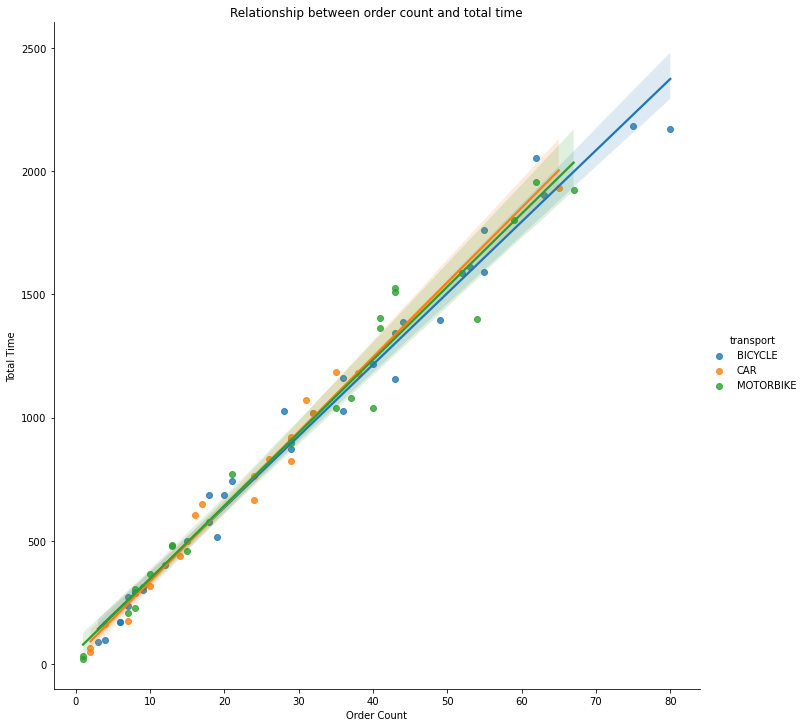

In [33]:
ax1 = sns.lmplot(data=courier_total_duration, x='order_count', y='total_time', fit_reg=True, hue='transport', legend=True, height=10);
ax1.set(title='Relationship between order count and total time', xlabel='Order Count', ylabel='Total Time')


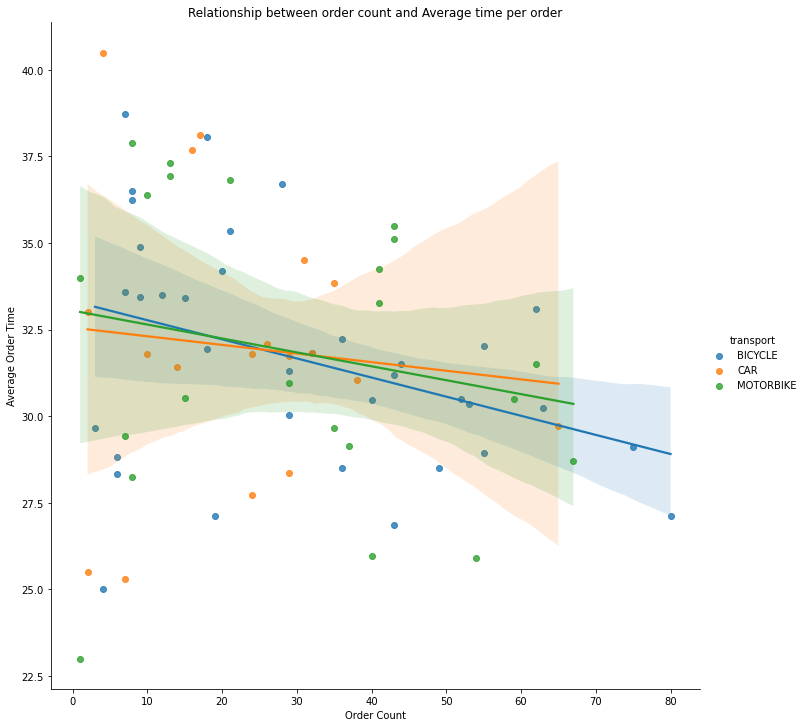

In [41]:
ax2 = sns.lmplot(data=courier_total_duration, x='order_count', y='avg_time_per_order', fit_reg=True, hue='transport', legend=True, height=10);
ax2.set(title='Relationship between order count and Average time per order', xlabel='Order Count', ylabel='Average Order Time')

In [52]:
print(f'Person correlation coefficients for order counts and total time: {np.corrcoef(courier_total_duration.order_count, courier_total_duration.total_time)[0][1]}')
print(f'Person correlation coefficients for order counts and average time per order: {np.corrcoef(courier_total_duration.order_count, courier_total_duration.avg_time_per_order)[0][1]}')

Person correlation coefficients for order counts and total time: 0.9897292979411064
Person correlation coefficients for order counts and average time per order: -0.2517804380883993


The correlation coefficent (r) of the relationship between the order counts and total time = 0.98 which indicates they are strongly related.
while the correlation coefficent (r) of the relationship between the order counts and total time = -0.25 which indicates they are weakly related.

# Core Analysis

## A- Reassignement Causes

An order is considered as reassigned when the numbe of reassignement is 2 or above. Therefore, we will only focus in this section on orders with number_of_reassignements > 1.

In [53]:
# let's see if there is any relationship between transport and reassignment
df_reassignmens = df_clean[df_clean['number_of_assignments'] > 1]
courier_reassignments = df_reassignmens.groupby(['transport']).agg(number_of_assignments=pd.NamedAgg(column="number_of_assignments", aggfunc="sum"), transport=pd.NamedAgg(column="transport", aggfunc="count"))
courier_reassignments.head()

,number_of_assignments,transport
transport,,
BICYCLE,346,155
CAR,151,66
MOTORBIKE,208,95


In [54]:
# Relationship between total real distance and number of assignments
reassignments = df_clean[df_clean['number_of_assignments'] > 1]

In [55]:
reassignments.sample(20)

,id,final_status,store_address_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,last_courier_assigned_time,courier_started_order_local,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time,total_time,time_difference_last_courier_assigned_and_courier_enters_pickup
1312,53336938,1,50828,2044461,WALL - Partner,1,BICYCLE,2,7,2019-07-14 13:56:57,2019-07-14 14:26:58,2019-07-14 14:36:41,2019-07-14 14:30:21,2019-07-14 14:43:01,2019-07-14 14:54:50,2019-07-14 14:59:17,2,0 days 00:03:23
1968,52549852,1,51356,18633956,WALL - Partner,1,BICYCLE,2,6,2019-07-09 21:57:48,2019-07-09 22:12:04,2019-07-09 22:13:26,2019-07-09 21:57:58,2019-07-09 22:31:50,2019-07-09 22:41:35,2019-07-09 22:50:58,53,-1 days +23:45:54
857,52954882,1,18300,9128251,WALL - Partner,1,MOTORBIKE,2,3,2019-07-12 14:43:14,2019-07-12 15:21:53,2019-07-12 15:22:18,2019-07-12 15:27:50,2019-07-12 15:33:58,2019-07-12 15:39:02,2019-07-12 15:43:37,0,0 days 00:05:57
1921,53431886,1,18296,18225711,WALL - Partner,1,CAR,2,8,2019-07-14 21:15:03,2019-07-14 21:50:27,2019-07-14 21:50:27,2019-07-14 22:18:57,2019-07-14 22:26:57,2019-07-14 22:32:53,2019-07-14 22:38:19,23,0 days 00:28:30
1515,52700715,1,18300,2146758,WALL - Partner,1,MOTORBIKE,2,8,2019-07-10 21:34:48,2019-07-10 22:18:13,2019-07-10 22:18:44,2019-07-10 22:00:31,2019-07-10 22:43:39,2019-07-10 22:52:00,2019-07-10 22:59:19,24,-1 days +23:42:18
1833,53211882,1,18300,14547214,WALL - Partner,1,BICYCLE,2,6,2019-07-13 20:38:49,2019-07-13 20:46:15,2019-07-13 20:46:15,2019-07-13 21:00:20,2019-07-13 21:12:48,2019-07-13 21:15:48,2019-07-13 21:16:11,37,0 days 00:14:05
1726,52840627,1,18300,17209225,WALL - Partner,1,BICYCLE,2,7,2019-07-11 20:23:27,2019-07-11 20:25:50,2019-07-11 20:28:38,2019-07-11 20:38:45,2019-07-11 20:42:54,2019-07-11 20:57:12,2019-07-11 20:58:25,34,0 days 00:12:55
1324,53260275,1,18300,2044461,WALL - Partner,1,BICYCLE,2,3,2019-07-13 23:55:21,2019-07-13 23:56:28,2019-07-13 23:56:42,2019-07-13 23:55:52,2019-07-14 00:03:59,2019-07-14 00:11:00,2019-07-14 00:12:25,17,-1 days +23:59:24
816,53453049,1,88585,15058361,WALL - Partner,1,BICYCLE,2,4,2019-07-14 22:09:12,2019-07-14 22:10:48,2019-07-14 22:13:04,2019-07-14 22:15:16,2019-07-14 22:44:53,2019-07-14 22:57:05,2019-07-14 23:02:25,53,0 days 00:04:28
2011,52555592,1,23518,15623935,WALL - Partner,1,BICYCLE,2,3,2019-07-09 22:23:56,2019-07-09 22:33:27,2019-07-09 22:33:50,2019-07-09 22:37:41,2019-07-09 22:43:49,2019-07-09 22:54:44,2019-07-09 22:57:00,33,0 days 00:04:14


In [56]:
bicycle_reassignemts = reassignments[reassignments.transport == 'BICYCLE']
bicycle_reassignemts.describe()

,id,final_status,store_address_id,courier_id,is_food,number_of_assignments,total_real_distance,total_time,time_difference_last_courier_assigned_and_courier_enters_pickup
count,155,155,155,155,155,155,155,155,155
mean,52957149,1,35206,15556488,1,2,5,30,0 days 00:00:39.941935483
std,353012,0,25150,3462441,0,1,2,15,0 days 00:16:16.289731311
min,52361444,1,15910,2044461,0,2,1,0,-1 days +23:10:13
25%,52622966,1,18300,14547214,1,2,3,19,-1 days +23:55:43
50%,53010218,1,18300,15623935,1,2,4,30,0 days 00:03:34
75%,53236334,1,50845,18225430,1,2,6,40,0 days 00:11:53.500000
max,53474600,1,90971,19090355,1,6,11,59,0 days 00:32:11


In [57]:
reassignments.groupby(['vertical', 'transport']).agg(reassignments=pd.NamedAgg(column='number_of_assignments', aggfunc='count'))

reassignments
vertical          transport               
WALL - NonPartner BICYCLE                2
                  CAR                    3
                  MOTORBIKE              2
WALL - Partner    BICYCLE              153
                  CAR                   63
                  MOTORBIKE             93

In [58]:
df_clean['time_difference_last_courier_assigned_and_courier_enters_pickup'] = df_clean['courier_enters_pickup_time_local'] - df_clean['last_courier_assigned_time']
df_clean[df_clean.number_of_assignments > 1].sort_values('activation_time_local')[['courier_id','number_of_assignments', 'activation_time_local', 'last_courier_assigned_time', 'courier_enters_pickup_time_local', 'time_difference_last_courier_assigned_and_courier_enters_pickup']].head(10)

,courier_id,number_of_assignments,activation_time_local,last_courier_assigned_time,courier_enters_pickup_time_local,time_difference_last_courier_assigned_and_courier_enters_pickup
1722,14631671,2,2019-07-08 12:17:23,2019-07-08 12:27:20,2019-07-08 12:20:19,-1 days +23:52:59
2212,9558769,3,2019-07-08 12:34:20,2019-07-08 12:47:39,2019-07-08 13:00:26,0 days 00:12:47
1780,14631671,2,2019-07-08 12:36:05,2019-07-08 12:37:29,2019-07-08 12:36:07,-1 days +23:58:38
2234,9558769,2,2019-07-08 13:41:01,2019-07-08 13:53:46,2019-07-08 14:01:26,0 days 00:07:40
2441,9558769,2,2019-07-08 18:49:04,2019-07-08 18:50:42,2019-07-08 19:05:19,0 days 00:14:37
526,8728852,3,2019-07-08 20:04:35,2019-07-08 20:25:49,2019-07-08 20:16:57,-1 days +23:51:08
338,4055620,2,2019-07-08 20:20:51,2019-07-08 20:28:22,2019-07-08 20:43:41,0 days 00:15:19
740,16298635,2,2019-07-08 20:30:23,2019-07-08 20:42:37,2019-07-08 20:42:33,-1 days +23:59:56
1286,14924108,4,2019-07-08 20:35:46,2019-07-08 21:23:18,2019-07-08 21:40:43,0 days 00:17:25
1472,13529777,3,2019-07-08 20:40:01,2019-07-08 21:10:17,2019-07-08 21:22:00,0 days 00:11:43


In [59]:
df_clean.time_difference_last_courier_assigned_and_courier_enters_pickup.mean()

Timedelta('0 days 00:03:48.571728187')

## Observations
####  Regarding reassignments can you see any clear trends / causality?

From the table above we filtered only the orders which has been reassigned, and on the time the reassigned order was accepted by the courier, the time diffenece between the current location time of the courier when he accepted the order and the pickup location time is by average of 4 mins away.

So we can conclude that couriers perfers to accept orders which are not very far from the pickup location, based on the time duration that it would take for hime to reach the pickup area.

####  What other causes that are not in the given data table can you think of affecting the number of times an order is reassigned?
We think that the missing information about the distance between the current location of the courier and the pickup location is the one that would give us a better analysis, and if we have a dataset that contains the following:
- The couriers' ID.
- Orders assigned to that courier.
- The accepted or rejected orders.
- The distance between the courirer current location and the pickup location.

These would help us more to build clear insights about the cause of reassignments.

## B- Variation of Pickup Time During

In [61]:
pickup_time = df_clean.copy()

In [62]:
pickup_time.head(20)

,id,final_status,store_address_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,last_courier_assigned_time,courier_started_order_local,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time,total_time,time_difference_last_courier_assigned_and_courier_enters_pickup
0,53134335,1,85260,20153483,WALL - Partner,1,BICYCLE,1,6,2019-07-13 13:04:44,2019-07-13 13:05:32,2019-07-13 13:06:49,2019-07-13 13:09:13,2019-07-13 13:28:45,2019-07-13 13:46:58,2019-07-13 13:59:49,55,0 days 00:03:41
1,53009545,1,23517,20153483,WALL - Partner,1,BICYCLE,1,4,2019-07-12 20:06:29,2019-07-12 20:10:42,2019-07-12 20:11:02,2019-07-12 20:16:05,2019-07-12 20:23:07,2019-07-12 20:37:53,2019-07-12 20:43:01,36,0 days 00:05:23
2,53129297,1,18300,20153483,WALL - Partner,1,BICYCLE,1,5,2019-07-13 12:14:58,2019-07-13 12:15:44,2019-07-13 12:23:40,2019-07-13 12:45:16,2019-07-13 12:50:09,2019-07-13 12:55:16,2019-07-13 12:59:23,44,0 days 00:29:32
4,53002671,1,15912,20153483,WALL - Partner,1,BICYCLE,1,3,2019-07-12 19:40:13,2019-07-12 19:41:14,2019-07-12 19:42:34,2019-07-12 19:46:28,2019-07-12 19:56:59,2019-07-12 20:07:08,2019-07-12 20:10:37,30,0 days 00:05:14
5,53210586,1,23518,20153483,WALL - Partner,1,BICYCLE,1,3,2019-07-13 20:34:10,2019-07-13 20:35:04,2019-07-13 20:36:19,2019-07-13 20:45:05,2019-07-13 20:49:33,2019-07-13 21:06:04,2019-07-13 21:08:21,34,0 days 00:10:01
6,53185358,1,85260,20153483,WALL - Partner,1,BICYCLE,1,6,2019-07-13 19:41:01,2019-07-13 19:41:09,2019-07-13 19:42:02,2019-07-13 19:46:44,2019-07-13 19:54:04,2019-07-13 20:06:23,2019-07-13 20:13:00,31,0 days 00:05:35
7,52487265,1,75822,20153483,WALL - Partner,1,BICYCLE,1,4,2019-07-09 16:14:36,2019-07-09 16:15:08,2019-07-09 16:23:44,2019-07-09 16:30:11,2019-07-09 16:42:56,2019-07-09 16:48:33,2019-07-09 16:55:44,41,0 days 00:15:03
8,52619792,1,18300,14547224,WALL - Partner,1,BICYCLE,1,4,2019-07-10 13:14:09,2019-07-10 13:15:07,2019-07-10 13:17:31,2019-07-10 13:14:29,2019-07-10 13:25:03,2019-07-10 13:32:51,2019-07-10 13:35:44,21,-1 days +23:59:22
9,52394270,1,18300,14547224,WALL - Partner,1,BICYCLE,1,6,2019-07-08 21:39:35,2019-07-08 21:40:35,2019-07-08 21:40:51,2019-07-08 21:46:20,2019-07-08 22:04:09,2019-07-08 22:12:40,2019-07-08 22:14:07,34,0 days 00:05:45
11,52462403,1,18300,14547224,WALL - Partner,1,BICYCLE,1,5,2019-07-09 12:37:21,2019-07-09 12:37:32,2019-07-09 12:37:39,2019-07-09 12:37:24,2019-07-09 12:52:02,2019-07-09 12:59:26,2019-07-09 13:03:48,26,-1 days +23:59:52


In [63]:
pickup_time['pickup_time_difference'] = pickup_time['pickup_time_local'] - pickup_time['courier_enters_pickup_time_local']
pickup_time['pickup_time_difference_in_minutes'] = pickup_time['pickup_time_difference'].dt.components['minutes']

In [64]:
pickup_time['pickup_time_difference'].dt.components['minutes'].mean()

14.130453020134228

### Data Issues Determination
#### None Accurate Order Total Times Calculation
From the dataset we noticed that the ```total_time``` column represents the difference between the ```activation_time_local``` and ```termination_time``` but we noticed the following issue which is showen in the following table and illustrated below.

In [65]:
# Getting wrong order total_time columns
pickup_time['calculated_total_time'] = (pickup_time['termination_time'] - pickup_time['activation_time_local'])

In [66]:
# None Accurate total time
none_accu_total_time = pickup_time.copy()

In [67]:
# Converting time differece to minutes.
none_accu_total_time['calculated_total_time_in_minutes'] = (none_accu_total_time['calculated_total_time'].dt.components['hours'] * 60) + none_accu_total_time['calculated_total_time'].dt.components['minutes']

In [68]:
none_accu_total_time[none_accu_total_time['total_time'] != none_accu_total_time['calculated_total_time_in_minutes']].head(20)

,id,final_status,store_address_id,courier_id,vertical,is_food,transport,number_of_assignments,total_real_distance,activation_time_local,...,courier_enters_pickup_time_local,pickup_time_local,courier_enters_delivery_point_time_local,termination_time,total_time,time_difference_last_courier_assigned_and_courier_enters_pickup,pickup_time_difference,pickup_time_difference_in_minutes,calculated_total_time,calculated_total_time_in_minutes
62,52683352,1,90971,14917583,WALL - Partner,1,BICYCLE,1,3,2019-07-10 20:27:06,...,2019-07-10 21:29:14,2019-07-10 21:33:10,2019-07-10 21:37:56,2019-07-10 21:40:00,12,0 days 00:03:53,0 days 00:03:56,3,0 days 01:12:54,72
89,52697568,1,18300,14917583,WALL - Partner,1,BICYCLE,1,5,2019-07-10 21:23:01,...,2019-07-10 21:46:21,2019-07-10 22:23:59,2019-07-10 22:30:03,2019-07-10 22:31:08,8,-1 days +23:51:31,0 days 00:37:38,37,0 days 01:08:07,68
93,52403052,1,18300,14917583,WALL - Partner,1,BICYCLE,2,5,2019-07-08 22:19:29,...,2019-07-08 22:21:41,2019-07-08 23:13:15,2019-07-08 23:18:01,2019-07-08 23:20:06,0,-1 days +23:19:43,0 days 00:51:34,51,0 days 01:00:37,60
110,53234584,1,34476,14917583,WALL - Partner,1,BICYCLE,1,3,2019-07-13 21:51:57,...,2019-07-13 22:23:29,2019-07-13 22:53:49,2019-07-13 22:59:06,2019-07-13 23:00:24,8,0 days 00:02:36,0 days 00:30:20,30,0 days 01:08:27,68
134,52382042,1,18300,14917583,WALL - Partner,1,BICYCLE,3,6,2019-07-08 20:52:01,...,2019-07-08 21:00:29,2019-07-08 21:57:29,2019-07-08 22:00:58,2019-07-08 22:01:55,9,-1 days +23:22:56,0 days 00:57:00,57,0 days 01:09:54,69
160,52713694,1,18300,14917583,WALL - Partner,1,BICYCLE,1,4,2019-07-10 22:30:06,...,2019-07-10 22:39:33,2019-07-10 23:34:29,2019-07-10 23:39:30,2019-07-10 23:42:50,12,-1 days +23:43:43,0 days 00:54:56,54,0 days 01:12:44,72
187,52494691,1,16712,13762181,WALL - NonPartner,0,CAR,2,4,2019-07-09 17:21:41,...,2019-07-09 17:52:00,2019-07-09 17:52:00,2019-07-09 18:07:29,2019-07-09 18:24:23,2,0 days 00:23:39,0 days 00:00:00,0,0 days 01:02:42,62
205,52717723,1,30640,13762181,WALL - Partner,1,CAR,1,9,2019-07-10 22:51:20,...,2019-07-10 23:27:08,2019-07-10 23:48:58,2019-07-10 23:53:23,2019-07-10 23:58:39,7,0 days 00:07:53,0 days 00:21:50,21,0 days 01:07:19,67
206,53248155,1,74656,13762181,WALL - Partner,1,CAR,1,7,2019-07-13 22:41:50,...,2019-07-13 23:10:18,2019-07-13 23:40:05,2019-07-13 23:47:40,2019-07-13 23:50:12,8,-1 days +23:55:30,0 days 00:29:47,29,0 days 01:08:22,68
216,53228133,1,30640,13762181,WALL - Partner,1,CAR,1,7,2019-07-13 21:31:21,...,2019-07-13 22:17:28,2019-07-13 22:32:46,2019-07-13 22:39:34,2019-07-13 22:43:24,12,0 days 00:17:56,0 days 00:15:18,15,0 days 01:12:03,72


In [69]:
none_accu_total_time.shape

(2384, 22)

## <p style='color:red'>Serious Issue in ```total_time``` Column Calculation</p>
>From the investigation we have discovered that there is an issue with the way the ```total_time``` column was calculated as you can tell from the ```calculated_total_time``` and the ```calculated_total_time_in_minutes``` that we have created. Thus, we found that the ```total_time``` was not correct for over 97% of the data.

>The way the ```total_time``` was calculated in the data was by taking only the <b>minutes</b> into consideration and ignoring the hour in the time set, but in our calculation we took the whole date and time format into consideration and then converted the result to minutes which is the accurate way to compare the difference between two times. 

In [70]:
acc_df = none_accu_total_time.copy()

In [71]:
acc_df.to_csv('acc_df.csv', index = False)

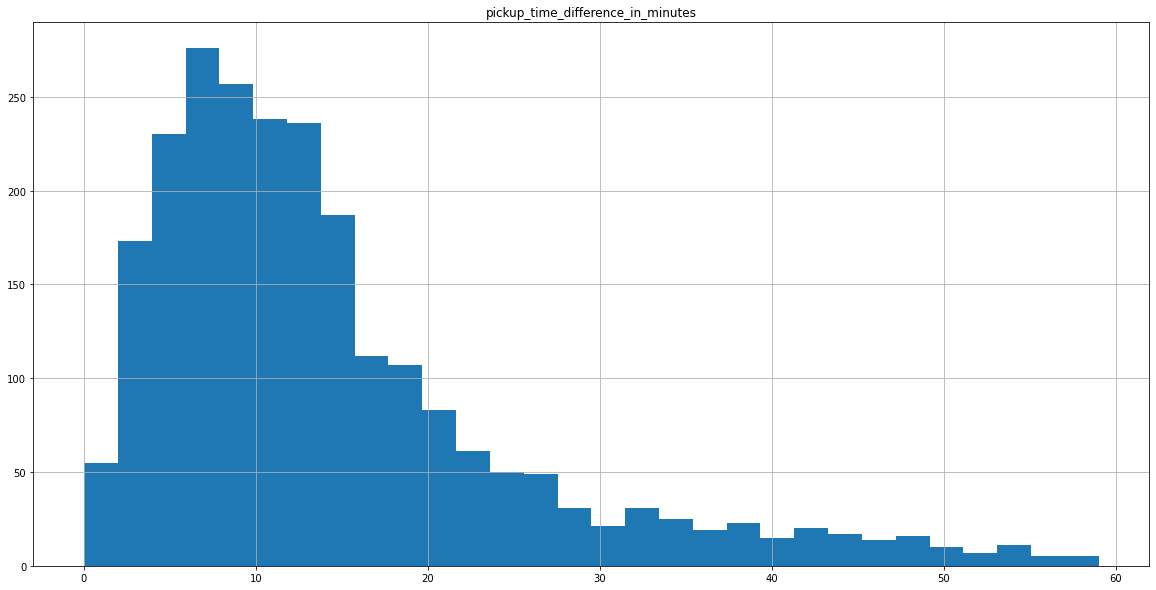

In [72]:
acc_df.hist('pickup_time_difference_in_minutes', bins=30, figsize=(20, 10));

From the histogram we can conclude that most of the dataset lies between 0 and 25 minutes of pickup time.

In [73]:
# Let's see the average pickup time for each store
store_avg_pickup_time = acc_df.groupby('store_address_id').agg(avg_pickup_time=pd.NamedAgg(column='pickup_time_difference_in_minutes', aggfunc='mean'))
store_avg_pickup_time.sample(20)

,avg_pickup_time
store_address_id,
34476,11
15912,9
23463,9
36615,10
18037,5
23518,8
18017,14
16698,25
15927,9


In [74]:
store_avg_pickup_time = store_avg_pickup_time.reset_index()

In [75]:
store_avg_pickup_time.head()

,store_address_id,avg_pickup_time
0,15727,13
1,15866,9
2,15908,9
3,15910,18
4,15912,9


In [76]:
store_avg_pickup_time.to_csv('ay_haga2.csv', index = False)

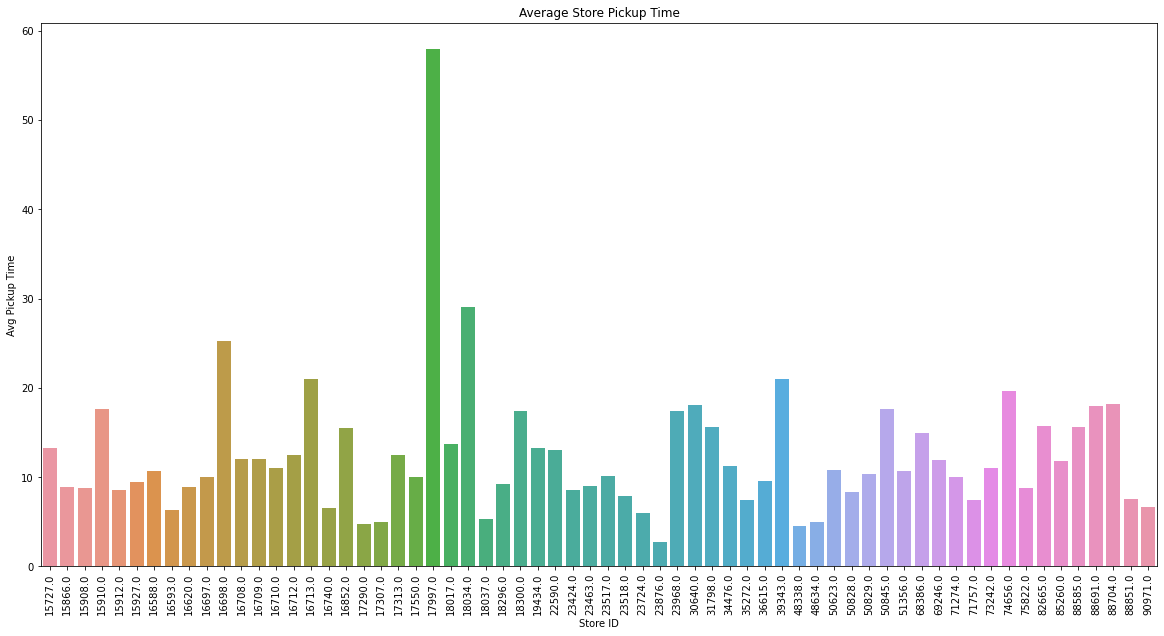

In [77]:
# Let's plot these results
plt.figure(figsize=(20, 10))
ax = sns.barplot(data=store_avg_pickup_time, x='store_address_id', y='avg_pickup_time')
ax.set(title='Average Store Pickup Time', xlabel='Store ID', ylabel='Avg Pickup Time')
ax.tick_params(axis='x', rotation=90)

In [57]:
# Describing store pickup time
store_avg_pickup_time.describe()

,store_address_id,avg_pickup_time
count,64,64
mean,36859,12
std,25527,8
min,15727,3
25%,16733,9
50%,23490,11
75%,50833,16
max,90971,58


## Observation
#### Can you identify any clear trends in terms of worst offenders? What could be causing this high variability?
From the previous analysis we calculated the average time for order pickup for each store and after plotting the data of 64 stores, we concluded that the delay issue could be related to the store service itself. For example, the store with ID 17997 has on average 58 mins of pickup time.

#### Propose at least one action to improve this situation.
We propose to have a consistent communication with the stores that causes the delay during the pickup process, and see what are the reasons that made this negative impact on the speed of their service. After the investigations made. Once we concluded these causes, we can improve them by adding that to the app if one of the causes is related to the preparation time duration of a product type for example, based on the service that the store provides.